In [1]:
import json
import pandas as pd
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import math

In [2]:
f = open('data\sentiment_dataset\data2_clean.json', encoding='utf-8')
skills = json.load(f)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\karlo\AppData\Local\Temp\ipykernel_20888\2514036228.py:1: SyntaxWarning: invalid escape sequence '\s'
  f = open('data\sentiment_dataset\data2_clean.json', encoding='utf-8')


In [3]:
skills = skills['data']

In [4]:
skills[0]

{'text': ' Фокус недели #ФН Сегодня ММК опубликует финансовую отчётность за 1 кв. 2020 #MAGN #Отчетность Магнит представит операционные результаты за 1 кв. 2020 #MGNT #Результаты Новатэк опубликует финансовую отчётность за 1 кв. 2020 #NVTK #Отчетность ФРС США представит решение по процентной ставке #ФРС #Макро Tesla опубликует финансовую отчётность за 1 кв. 2020 #TSLA #Отчетность Microsoft опубликует финансовую отчётность за 1 кв. 2020 #MSFT #Отчетность Facebook опубликует финансовую отчётность за 1 кв. 2020 #FB #Отчетность 30 апреля Детский мир опубликует финансовую отчётность по МСФО за 2019 #DSKY #Отчетность Энел Россия опубликует финансовую отчётность по РСБУ за 1 кв. #ENRU #Отчетность Evraz представит операционные результаты за 1 кв. 2020 #EVR #Результаты НорНикель опубликует производственные результаты за 1 кв. 2020 #GMKN #Результаты РусГидро представит финансовую отчётность по РСБУ за 1 кв. 2020 #HYDR #Отчетность СД НЛМК рассмотрит дивиденды за 1 кв. 2020 #NLMK #Дивиденды Apple 

In [6]:
all_skills = []
for i in tqdm(range(len(skills))): 
    skill_obj = skills[i]['name']
    skills_in = []
    for j in range(len(skill_obj)): 
        skills_in.append(skill_obj[j])
    all_skills.append(skills_in)

100%|██████████| 15385/15385 [00:00<00:00, 1695597.84it/s]


In [7]:
texts = []
for i in skills: 
    texts.append(i['text'])

In [8]:
count_of_words = []
for i in texts: 
    count_of_words.append(len(i.split(' ')))

In [9]:
sum(count_of_words) / len(count_of_words)

102.48326291842704

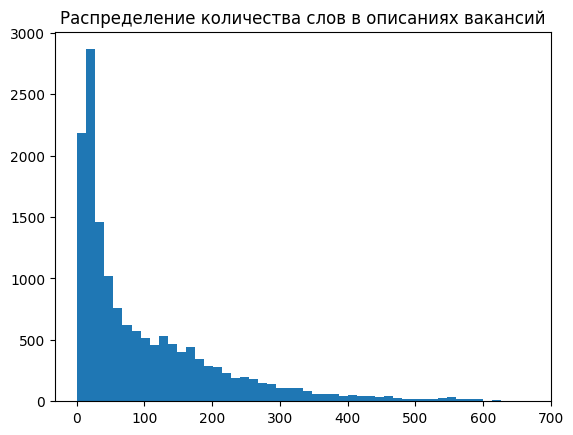

In [10]:
plt.hist(count_of_words, bins=50)
plt.title('Распределение количества слов в описаниях вакансий')
plt.show()

In [11]:
texts[0]

' Фокус недели #ФН Сегодня ММК опубликует финансовую отчётность за 1 кв. 2020 #MAGN #Отчетность Магнит представит операционные результаты за 1 кв. 2020 #MGNT #Результаты Новатэк опубликует финансовую отчётность за 1 кв. 2020 #NVTK #Отчетность ФРС США представит решение по процентной ставке #ФРС #Макро Tesla опубликует финансовую отчётность за 1 кв. 2020 #TSLA #Отчетность Microsoft опубликует финансовую отчётность за 1 кв. 2020 #MSFT #Отчетность Facebook опубликует финансовую отчётность за 1 кв. 2020 #FB #Отчетность 30 апреля Детский мир опубликует финансовую отчётность по МСФО за 2019 #DSKY #Отчетность Энел Россия опубликует финансовую отчётность по РСБУ за 1 кв. #ENRU #Отчетность Evraz представит операционные результаты за 1 кв. 2020 #EVR #Результаты НорНикель опубликует производственные результаты за 1 кв. 2020 #GMKN #Результаты РусГидро представит финансовую отчётность по РСБУ за 1 кв. 2020 #HYDR #Отчетность СД НЛМК рассмотрит дивиденды за 1 кв. 2020 #NLMK #Дивиденды Apple опубликуе

In [12]:
data_texts = pd.DataFrame()
data_texts['description'] = texts 

In [13]:
data_texts

,description
0,Фокус недели #ФН Сегодня ММК опубликует финан...
1,#LSRG ЛСР - операционные результаты (2019г) *п...
2,#CHMF Северсталь (CHMF) впервые поставила в Бр...
3,"""Версия: Многоходовочка по Роснефти Роснефтега..."
4,🟢 Новости к этому часу ⚪️ФРС США необходимо пр...
...,...
15380,SMLT +2% Недвига срет сегодня охуенно 🚀
15381,"""#NLMK ""Новолипецкий металлургический комбинат..."
15382,За 2020 год на МосБирже может появиться 10 но...
15383,UPD: ТА Интер РАО UPD: ТА Новатэк


In [14]:
skills[1]['name']

[[6, 9], [1, 5]]

In [15]:
all_intervals = []
all_skills = []
left_shift = 0
for j in range(len(skills)):
    intervals = []
    skiller = []
    skills_text = data_texts.loc[j]['description']
    for i in range(len(skills[j]['name'])):
        if skills[j]['name'][i][1] <= len(skills_text):
            interval = skills[j]['name'][i]
            start = interval[0] - left_shift
            end = interval[1] - left_shift
            while skills_text[start] == ' ' and start < end: 
                start += 1
            while skills_text[end - 1] == ' ' and end > start:
                end -= 1
            left = skills_text[:start].count(' ')
            right = skills_text[:end].count(' ')
            intervals.append(str(start - left)+':'+str(end - right))
            skiller.append(skills_text[start:end])

    all_intervals.append(intervals)
    all_skills.append(skiller)

In [16]:
counter = 0
for i in range(len(all_skills)): 
    counter += len(all_skills[i]) 
counter

45035

In [17]:
found_skills = []
for i in all_intervals: 
    found_skills.append(';'.join(i))

In [18]:
found_name_skills = []
for i in all_skills: 
    found_name_skills.append(';'.join(i))

In [19]:
len(found_skills)

15385

In [20]:
data_texts['desc_skills'] = found_name_skills
data_texts['skills_ind'] = found_skills

In [21]:
data_texts

,description,desc_skills,skills_ind
0,Фокус недели #ФН Сегодня ММК опубликует финан...,MAGN;ММК,65:69;21:24
1,#LSRG ЛСР - операционные результаты (2019г) *п...,ЛСР;LSRG,5:8;1:5
2,#CHMF Северсталь (CHMF) впервые поставила в Бр...,CHMF;Северсталь;CHMF,16:20;5:15;1:5
3,"""Версия: Многоходовочка по Роснефти Роснефтега...",Роснефти;Роснефти;Роснефте;Роснефти;Роснефте,213:221;204:212;182:190;24:32;32:40
4,🟢 Новости к этому часу ⚪️ФРС США необходимо пр...,NVTK;НОВАТЭК,970:974;466:473
...,...,...,...
15380,SMLT +2% Недвига срет сегодня охуенно 🚀,SMLT,0:4
15381,"""#NLMK ""Новолипецкий металлургический комбинат...",НЛМК;NLMK;НЛМК,705:709;2:6;752:756
15382,За 2020 год на МосБирже может появиться 10 но...,Эталон груп,220:230
15383,UPD: ТА Интер РАО UPD: ТА Новатэк,Новатэк,20:27


In [22]:
data_texts.to_csv('data_less_ind.csv', index=False)